In [1]:
import numpy
from matplotlib import pyplot
%matplotlib inline

In [2]:
from mpl_toolkits import mplot3d
from matplotlib import cm

In [15]:
def analytical_solution(x, y, Lx, Ly):
    X, Y = numpy.meshgrid(x, y)
    u = (numpy.sinh(1.5*numpy.pi*Y/Ly)*(numpy.sin(1.5*numpy.pi*X/Lx)))/numpy.sinh(1.5*numpy.pi*Ly/Lx)
    return u

In [16]:
Lx, Ly = 1.0, 1.0
nx, ny = 41, 41

x = numpy.linspace(0.0, Lx, num=nx)
y = numpy.linspace(0.0, Ly, num=ny)

ua = analytical_solution(x, y, Lx, Ly)

In [17]:
def plot_3d(x, y, u):
    fig = pyplot.figure(figsize=(8.0, 6.0))
    ax = mplot3d.Axes3D(fig)
    X, Y = numpy.meshgrid(x, y)
    ax.plot_surface(X, Y, u, cmap=cm.viridis)
    ax.view_init(elev=30.0, azim=45.0)

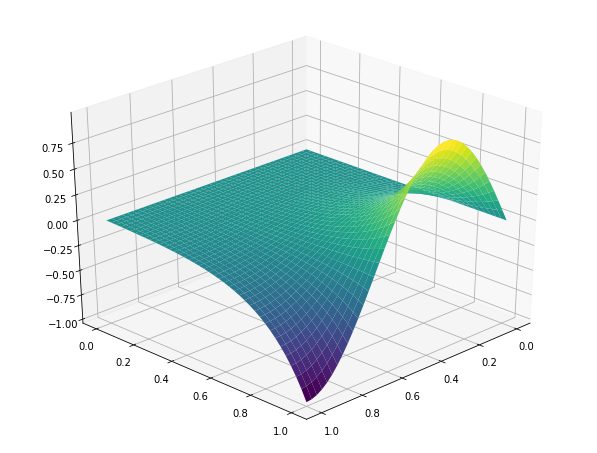

In [18]:
plot_3d(x, y, ua)

In [19]:
def relative_12_norm(u, u_ref):
    rdiff = numpy.sqrt(numpy.sum((u - u_ref)**2))/numpy.sqrt(numpy.sum(u_ref**2))
    return rdiff

In [20]:
def laplace2d_jacobi(u0, rtol=1e-6, maxiter=20000):
    u = u0.copy()
    ite = 0
    rdiff = rtol + 1.0
    while rdiff > rtol and ite < maxiter:
        un = u.copy()
        u[1: -1, 1: -1] = 0.25*(u[:-2, 1:-1] + u[1:-1, 2:] + u[1:-1, 2:] + u[2:, 1:-1])
        u[1:-1, -1] = u[1:-1, -2]
        rdiff = relative_12_norm(u, un)
        ite += 1
    return u, ite, rdiff

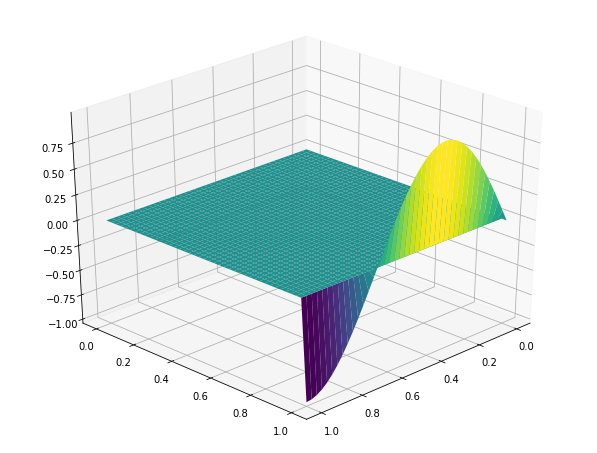

In [24]:
u0 = numpy.zeros((ny, nx))
u0[-1, :] = numpy.sin(1.5*numpy.pi*x/Lx)
plot_3d(x, y, u0)

In [26]:
u, ites, rdiff = laplace2d_jacobi(u0, rtol=1e-8)
print(ites, rdiff)

7665 9.991116067228703e-09


In [32]:
nx_values = [11, 21, 41, 81]
errors = []

for nx in nx_values:
    print(nx)
    x = numpy.linspace(0.0, Lx, num=nx)
    y = x.copy()
    u0 = numpy.zeros((nx, nx))
    u0[-1, :] = numpy.sin(1.5*numpy.pi*x/Lx)
    u = laplace2d_jacobi(u0, rtol=1e-8)[0]
    ua = analytical_solution(x, y, Lx, Lx)
    error = relative_12_norm(u, ua)
    errors.append(error)

11
21
41
81


TypeError: unsupported operand type(s) for -: 'list' and 'int'

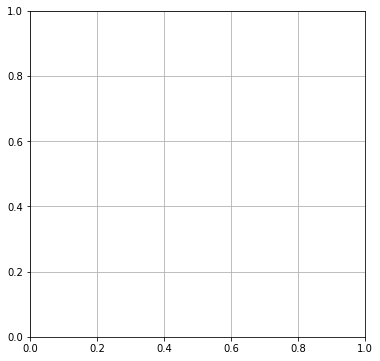

In [61]:
pyplot.figure(figsize=(6, 6))
pyplot.grid()
dx_values = []
for nx in nx_values:
    dx_values.append(Lx/(nx_values - 1))    
pyplot.loglog(dx_values, errors, markers='o')
pyplot.axis('equal');

In [54]:
def laplace2d_jacobi_neumann(u0, rtol=1e-6, maxiter=20000):
    u = u0.copy()
    ite = 0
    rdiff = rtol + 1.0
    while rdiff > rtol and ite < maxiter:
        un = u.copy()
        u[1: -1, 1: -1] = 0.25*(u[:-2, 1:-1] + u[1:-1, 2:] + u[1:-1, 2:] + u[2:, 1:-1])
        u[1: -1, -1] = u[1:-1, -2]
        u[1: -1, -1] = 0.25*(u[:-2, -1] + 2*u[1: -1, -2] + u[2:, -1])
        rdiff = relative_12_norm(u, un)
        ite += 1
    return u, ite, rdiff

In [51]:
nx_values = [11, 21, 41, 81]
errors = []

for nx in nx_values:
    print(nx)
    x = numpy.linspace(0.0, Lx, num=nx)
    y = x.copy()
    u0 = numpy.zeros((nx, nx))
    u0[-1, :] = numpy.sin(1.5*numpy.pi*x/Lx)
    u = laplace2d_jacobi(u0, rtol=1e-8)[0]
    ua = analytical_solution(x, y, Lx, Lx)
    error = relative_12_norm(u, ua)
    errors.append(error)

11
21
41
81


TypeError: unsupported operand type(s) for /: 'float' and 'list'

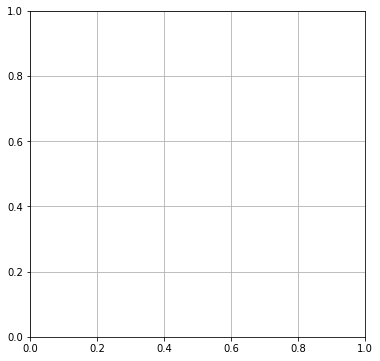

In [58]:
pyplot.figure(figsize=(6, 6))
pyplot.grid()
dx_values = []
for nx in nx_values:
    dx_values.append(Lx/(nx_values) - 1)
pyplot.loglog(dx_values, errors, markers='o')
pyplot.axis('equal');